# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting

# 1. Introduction



Welcome to my Jupyter notebook for the Kaggle competition "House Prices - Advanced Regression Techniques". In this competition, the goal is to predict the sale prices of homes based on a variety of features. This project provides an opportunity to practice advanced regression techniques, feature engineering, and model evaluation.

### Objective

The objective of this competition is to develop a regression model that accurately predicts the sale prices of houses. To achieve this, we'll perform exploratory data analysis, preprocess the dataset, engineer relevant features, train various regression models, and evaluate their performace.

### Dataset Overview

The dataset provided for this competition contains information about various attributes of residential homes. It includes features such as square footage, number of bedrooms, location, and more. Additionally, the dataset contains the target variable, which is the sale price of eac house.

### Tools and Libraries Used

- Python
- Pandas for data manipulation
- Matplotlib and Seaborn for data visualization
- Scikit-learn for model building and evaluation

Now, let's start by loading and exploring the dataset to gain a better understanding of the features and their relationships with the target variable.


# 2. Data Exploration and Preprocessing

## Load and Exploring the dataset

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [201]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [202]:
df = pd.read_csv('data_downloaded/train.csv')

In [203]:
df.shape

(1460, 81)

In [204]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Handling Missing Values

In [205]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

### Observing Nan Values

In [206]:
# i want to drop nan values less then 25
def drop_nan_lessthen(df, nan_qty):
    '''
    we give a df and a quantity value (integer)
    it checks nan values for the df
    and drop the values less then this qty amount
    '''
    drop_columns = []
    nan_series = df.isnull().sum()
    for i,v in nan_series.iteritems():
        if v < nan_qty:
            drop_columns.append(i)
    df.dropna(subset=drop_columns, inplace=True)
    return df

In [207]:
df1 = drop_nan_lessthen(df, 25)

In [208]:
df1.shape

(1451, 81)

In [209]:
missing_values = df1.isnull().sum()[df1.isnull().sum().sort_values(ascending=False)>25].sort_values(ascending=False)
missing_values

PoolQC          1444
MiscFeature     1397
Alley           1361
Fence           1170
FireplaceQu      685
LotFrontage      257
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64

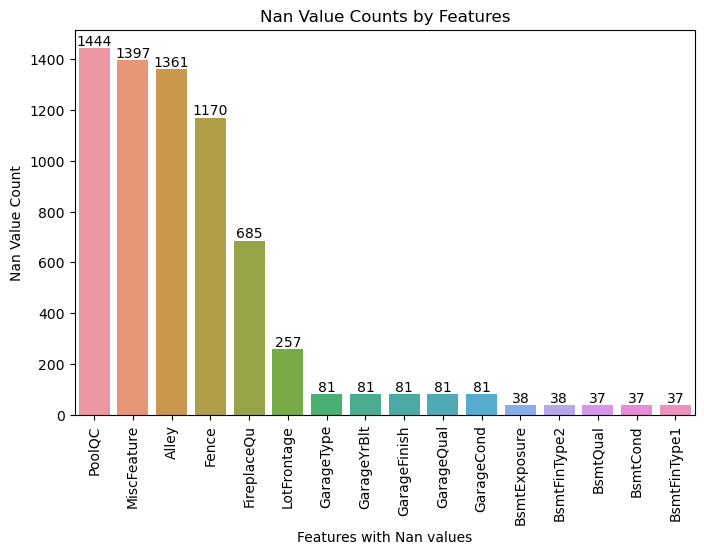

In [210]:
plt.figure(figsize=(8,5)) 
ax = sns.barplot(x=missing_values.index, y=missing_values.values)

plt.xticks(rotation=90)
plt.xlabel('Features with Nan values')
plt.ylabel('Nan Value Count')
plt.title('Nan Value Counts by Features')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Categorical Variables: Replacing Nan Values

**NOTE: Not every nan value is missing value:**  
If we carefull explore the data the NAN values are not actually missing but has a meaning. For categorical variables, they mean this category not exist for that observation. For numerical variables like 'GarageYrBlt' and 'LotFrontage' they may mean No data available or Like categorical variables, not lot frontage or no garage exists. Therefore we will double check numeric nan values with other features 

In [211]:
replacement_dictionary = {
                            'PoolQC'      : 'No Pool',
                            'MiscFeature' : 'No MiscFeatures',  
                            'Alley'       : 'No Alley Access',
                            'Fence'       : 'No Fence',
                            'FireplaceQu' : 'No FirePlace', 
                            'GarageFinish': 'No Garage',
                            'GarageQual'  : 'No Garage',
                            'GarageCond'  : 'No Garage',
                            'GarageType'  : 'No Garage',
                            'BsmtExposure': 'No Basement',
                            'BsmtCond'    : 'No Basement',
                            'BsmtQual'    : 'No Basement',
                            'BsmtFinType2': 'No Basement',
                            'BsmtFinType1': 'No Basement'
}

In [212]:
replacement_columns = list(replacement_dictionary.keys())
replacement_columns

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageType',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1']

In [213]:
for col in replacement_columns:
    df1[col].fillna(replacement_dictionary[col], inplace=True)

In [214]:
print(f" Garage Type - No Garage: {df1['GarageType'].value_counts()['No Garage']}"
      f"\nNan Values in GarageYrBlt: {df1['GarageYrBlt'].isna().sum()}")

 Garage Type - No Garage: 81
Nan Values in GarageYrBlt: 81


In [215]:
print(f" LotConfig - Inside Lot: {df1['LotConfig'].value_counts()['Inside']}"
      f"\nNan Values in LotFrontage: {df1['LotFrontage'].isna().sum()}")

 LotConfig - Inside Lot: 1045
Nan Values in LotFrontage: 257


For GarageYrBlt its obvious that nan values mean no Garage 
LotFrontage: i couldnt find a clue, but since all other mean the same, i will comments similarly

In [216]:
replacement_dictionary_numeric = {
                            'LotFrontage' :0,
                            'GarageYrBlt' : 0
}

In [217]:
for col in ['LotFrontage', 'GarageYrBlt']:
    df1[col].fillna(replacement_dictionary_numeric[col], inplace=True)

In [218]:
# lets check nan values now again:
df1.isnull().sum().sort_values().nlargest(3)

Id             0
FireplaceQu    0
Fireplaces     0
dtype: int64

In [219]:
df2 = df1.copy()

In [220]:
df2.shape

(1451, 81)

## Feature Engineering

### Summarizing Features: Creating new Features and drop old ones

Combining features to create new ones is a powerful technique. For example, combining area measurements to get a "Total Area" feature can often provide more meaningful information. We will also use our Domain Knowledge as well

__Total Area__  
We will combine features named TotalBsmtSF (total basement square footage), 1stFlrSF (first floor square footage), and 2ndFlrSF (second floor square footage) to create a 'Total Area' feature.  

- Maybe we can try to add basement sq footage with multiplying 0.5 since the basement is not as valuable as ground level footage

In [221]:
df2['Total_Area'] = df2['TotalBsmtSF'] + df2['1stFlrSF'] + df2['2ndFlrSF']
df2[['Total_Area', 'TotalBsmtSF',  '1stFlrSF', '2ndFlrSF']].head(3)

,Total_Area,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,2566,856,856,854
1,2524,1262,1262,0
2,2706,920,920,866


In [222]:
# Lets drop remainin columns
# i will drop TotalBsmtSF column later, because i will need bsmt sf down when i deal with features related to basement
df2.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)

In [223]:
df2.shape

(1451, 80)

__Total Bathrooms__

Like in sq footage we will combine the bathrooms into a total bathroom quantity.

In [224]:
bathroom_columns = [col for col in df2.columns if 'bath' in col.lower()]
bathroom_columns

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [225]:
df2['Total_Bathrooms'] = df2['BsmtFullBath'] + df2['FullBath'] + 0.5*(df2['BsmtHalfBath'] + df2['HalfBath'])

In [226]:
df2[['Total_Bathrooms', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].head(3)

,Total_Bathrooms,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,3.5,1,0,2,1
1,2.5,0,1,2,0
2,3.5,1,0,2,1


In [227]:
df2.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

__Age of the house__

i think the age of sth is more intuitive and comparable rather than the build year sth like 1995

In [228]:
newest_blt = df2['YearBuilt'].max()
newest_blt

2010

In [229]:
df2['Age_of_Property'] = newest_blt - df2['YearBuilt']

In [230]:
df2[['Age_of_Property', 'YearBuilt']].head(3)

,Age_of_Property,YearBuilt
0,7,2003
1,34,1976
2,9,2001


In [231]:
df2.drop(columns=['YearBuilt'], inplace=True)

__Renovation Adding Date__

In [232]:
df2['Age_of_Renovation'] = newest_blt - df2['YearRemodAdd']

In [233]:
df2[['Age_of_Renovation', 'YearRemodAdd']].head(3)

,Age_of_Renovation,YearRemodAdd
0,7,2003
1,34,1976
2,8,2002


In [234]:
df2.drop(columns = ['YearRemodAdd'], inplace=True)

__Garage Columns__

In [235]:
garage_columns = [col for col in df2.columns if 'garage' in col.lower()]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

I want to hold GarageArea column, and create a binary value column indicating the property has a garage or not.  
i will drop other columns  
this is an approach coming from domain knowledge but also for simplicity  
Later on, we can tune the model with more features

In [236]:
df2['GarageType'].value_counts()

Attchd       863
Detchd       387
BuiltIn       86
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [237]:
df2['HasGarage'] = (df2['GarageType'] != 'No Garage').astype(int)
df2[['HasGarage', 'GarageType']].sample(5)

,HasGarage,GarageType
315,1,Attchd
301,1,BuiltIn
914,1,Detchd
9,1,Attchd
96,1,Attchd


In [238]:
df2.drop(columns= ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond'], inplace=True)

In [239]:
garage_columns_final = [col for col in df2.columns if 'garage' in col.lower()]
garage_columns_final

['GarageArea', 'HasGarage']

__Pool Column__

Lets also change the pool columns into a one binary feature as well, indicating whether the property has a pool or not  
['PoolArea', 'PoolQC']

In [240]:
df2['PoolQC'].value_counts()

No Pool    1444
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [241]:
df2['HasPool'] = (df2['PoolQC'] != 'No Pool').astype(int)

In [242]:
df2['HasPool'].value_counts()

0    1444
1       7
Name: HasPool, dtype: int64

In [243]:
df2.drop(columns =['PoolArea', 'PoolQC'], inplace=True)

In [244]:
# Lets assign a new df for following the changes we have made so far
df3 = df2.copy()
df3.shape

(1451, 71)

__Neighborhood__

I want to create mean and median prices for each neighborhood and drop neighborhoods itself  
Because generally, prices are really dependent on the neighborhood  
We can also work with sqft prices as well

In [245]:
neighborhood_median_price = df3.groupby('Neighborhood')['SalePrice'].median().reset_index()
neighborhood_median_price.columns = ['Neighborhood', 'MedianHousePrice']

I will use this neighborhood_median_price dataframe when we prepare and **predict prices on test dataset**

In [246]:
neighborhood_median_price

,Neighborhood,MedianHousePrice
0,Blmngtn,191000.0
1,Blueste,137500.0
2,BrDale,106000.0
3,BrkSide,124300.0
4,ClearCr,200250.0
5,CollgCr,196500.0
6,Crawfor,208550.0
7,Edwards,121750.0
8,Gilbert,181000.0
9,IDOTRR,103000.0


In [247]:
df4 = pd.merge(df3, neighborhood_median_price, on='Neighborhood', how='left')

In [248]:
df4[['Neighborhood', 'MedianHousePrice']].sample(3)

,Neighborhood,MedianHousePrice
129,NAmes,140000.0
1405,BrkSide,124300.0
472,NridgHt,314906.5


In [249]:
df4.drop(columns=['Neighborhood'], inplace=True)

In [250]:
df4.shape

(1451, 71)

__Basement columns__

There are many features related to basement. Lets try to combine, elminate or summmarize them

In [251]:
basement_columns_initial = [col for col in df4.columns if 'bsmt' in col.lower()]
basement_columns_initial

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF']

- I will give grades to Basement Quality, Basement Condition, Basement Exposure
- I will combine Basement finTypes and SF into one feature having a grade
- Then i will combine all 4 features into one feature Ovarall Basement Quality with a total grade
- if the grade is zero - that means no basement/ but we need to check all the columns have synchronized no basement values or not
- i will drop the remaining

In [252]:
# Define different mappings for each basement features
bsmt_qual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement': 0}
bsmt_cond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0}
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0}
bsmt_fintype_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0}


In [253]:
# FIRST: lest check what our data looks like for fintype columns

df4[['BsmtQual','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].sample(5)

,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
1081,Gd,Unf,0,Unf,0,1082,1082
1221,TA,ALQ,595,Unf,0,317,912
962,TA,Rec,428,Unf,0,300,728
678,TA,Rec,182,Unf,0,611,793
956,TA,BLQ,696,Unf,0,162,858


it looks like BsmtFinSF1+BsmtFinSF2+BsmtUnfSF == TotalBsmtSF  
if type1 and type2 has unf category, the sf writes in the BsmtUnfSF	

In [254]:
# lets double check if we are right with our assumptions related to categories and sq footages calculations

check_bsmt_sf = df4['TotalBsmtSF'] == (df4['BsmtFinSF1'] + df4['BsmtFinSF2'] + df4['BsmtUnfSF'])
check_bsmt_sf.value_counts()

# if all values come true, that means my hypotesis above is correct

True    1451
dtype: int64

**I am thinking to make a combined Basement Finishing Type Feature.**  
- Firstly, we will map the string categories into grades in BsmtFinType1 and BsmtFinType2
- Secondly, We will normalize BsmtFinSF1, BsmtFinSF2, BsmtUnfSF because all totally makes TotalBsmtSF
- Thirdly, SF1 * TYPE1_GRADE + SF2 * TYPE2_GRADE + SF3 * 1 (1 is the grade score of unf category)
- Actually BsmtUnfSF column is a seperated value from other columns because the other two columns have unf categories as well
-  For example, if BsmtFinType2 == Unf normally we are expecting BsmtFinSF2 have a float value. But in our dataset it comes 0.0 and the value is coming with a seperate column named BsmtUnfSF. So we assume that they are iconic 

In [255]:
# Convert the categorical str values into grade points by mapping function

df4['BsmtFinType1'] = df4['BsmtFinType1'].map(bsmt_fintype_mapping)
df4['BsmtFinType2'] = df4['BsmtFinType2'].map(bsmt_fintype_mapping)

In [256]:
df4['BsmtFinGrade'] = (df4['BsmtFinType1'] * df4.BsmtFinSF1 / df4.TotalBsmtSF) + \
                            (df4['BsmtFinType2'] * df4.BsmtFinSF2 / df4.TotalBsmtSF) + \
                            (df4['BsmtFinType1'] * df4.BsmtUnfSF / df4.TotalBsmtSF)

In [257]:
# Because of zero division there will be Nan values where there are no basement, since TotalBsmtSf == 0

df4['BsmtFinGrade'].fillna(0.0, inplace=True)

**Lets Also map and convert other basement related categorical columns**

In [258]:
df4['BsmtQual'] = df4['BsmtQual'].map(bsmt_qual_mapping)
df4['BsmtCond'] = df4['BsmtCond'].map(bsmt_cond_mapping)
df4['BsmtExposure'] = df4['BsmtExposure'].map(bsmt_exposure_mapping)

No we can combine all grades into one SINGLE grade point

In [259]:
df4['BsmtOverallGrade'] = df4['BsmtQual'] + df4['BsmtCond'] + df4['BsmtExposure'] + df4['BsmtFinGrade']

In [260]:
# Lets check what we have made so far
df4[df4.columns[df4.columns.str.contains('Bsmt')]].sample(5)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFinGrade,BsmtOverallGrade
492,3,3,1,4,374,2,532,363,1269,3.161545,10.161545
1060,4,3,1,1,0,1,0,799,799,1.000000,9.000000
451,5,3,1,5,742,1,0,130,872,5.000000,14.000000
80,4,3,1,3,448,1,0,448,896,3.000000,11.000000
832,4,3,1,4,442,1,0,625,1067,4.000000,12.000000


**Lets drop all unnecessary columns**

In [261]:
df4.drop(columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2',
                          'BsmtFinSF2','BsmtUnfSF','BsmtFinGrade'], inplace=True)

In [262]:
# We can NOW also drop TotalBsmtSF because this value is already in the Total Sqf feature
df5 = df4.drop(columns = ['TotalBsmtSF'])

In [263]:
# here is the remaining Basement column
df5[df5.columns[df5.columns.str.contains('Bsmt')]].describe().T

,count,mean,std,min,25%,50%,75%,max
BsmtOverallGrade,1451.0,11.592464,3.460897,0.0,9.0,11.56,14.0,18.0


In [264]:
df5.shape

(1451, 63)

### High and Low Cardinality

**High Cardinality:** High cardinality features (features with a large number of unique values) can sometimes introduce noise into the model. Dropping or encoding them appropriately can be a good strategy.

**Low Cardinality:** Low cardinality features with little variation may not contribute much information. We can Consider dropping or consolidating them.

In [267]:
df5.nunique().sort_values(ascending=False)

Id                   1451
LotArea              1066
Total_Area            957
GrLivArea             858
SalePrice             657
GarageArea            438
MasVnrArea            327
WoodDeckSF            274
OpenPorchSF           201
BsmtOverallGrade      180
EnclosedPorch         119
Age_of_Property       112
LotFrontage           111
ScreenPorch            76
Age_of_Renovation      61
MedianHousePrice       25
LowQualFinSF           24
MiscVal                21
3SsnPorch              20
Exterior2nd            16
MSSubClass             15
Exterior1st            15
MoSold                 12
TotRmsAbvGrd           12
OverallQual            10
Total_Bathrooms        10
OverallCond             9
Condition1              9
SaleType                9
RoofMatl                8
Condition2              8
BedroomAbvGr            8
HouseStyle              8
Functional              7
RoofStyle               6
Heating                 6
Foundation              6
SaleCondition           6
FireplaceQu 

**Firstly**, we need to drop ID column, because it has unique values and results in high cardinality  

In [268]:
df5.drop(columns=['Id'], inplace=True)

Lets observe more on categorical features

In [269]:
df5.describe(include='object').T

,count,unique,top,freq
MSZoning,1451,5,RL,1145
Street,1451,2,Pave,1445
Alley,1451,3,No Alley Access,1361
LotShape,1451,4,Reg,918
LandContour,1451,4,Lvl,1302
Utilities,1451,2,AllPub,1450
LotConfig,1451,5,Inside,1045
LandSlope,1451,3,Gtl,1373
Condition1,1451,9,Norm,1251
Condition2,1451,8,Norm,1436


**Secondly,** 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature' columns has too low variations and resulting **Low Cardinalty**  
Therefore i consider to drop them

In [270]:
df6 = df5.drop(columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature'])

In [271]:
df6.shape

(1451, 56)

### Multicollinearity

**Identifying Correlated Features:** Identifying and addressing multicollinearity is crucial for regression models. Dropping one of a set of highly correlated features is a good strategy. It helps to keep the model more interpretable and efficient.  
**VIF (Variance Inflation Factor)**: If you want a more quantitative approach to assess multicollinearity, you can use VIF. A high VIF score indicates a high correlation between a feature and other features in the dataset.

Before diving into mathematical calculations, we can check any variables with our domain knowledge


'GrLivArea', 'TotRmsAbvGrd', 'Total_Area' are strongly correlated each other. I need to find a balance between dropping and holding  
I think Room Number is important along with Total Area  
So i can drop Living Area Above the Ground

In [272]:
df6.drop(columns=['GrLivArea'], inplace=True)

#### Numeric Features: Correlation Matrix

In [279]:
corr_matrix = df6.corr()[(df6.corr().abs() > 0.7) & (df6.corr().abs() != 1)]

# Drop rows and columns with all NaN values
corr_matrix = corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
corr_matrix

,OverallQual,SalePrice,Total_Area,MedianHousePrice
OverallQual,NaN,0.790085,NaN,NaN
SalePrice,0.790085,NaN,0.783327,0.732735
Total_Area,NaN,0.783327,NaN,NaN
MedianHousePrice,NaN,0.732735,NaN,NaN


I didnt see any issues here

#### Categorical Features: Cramer's V

In [280]:
df6.describe(include='object').T

,count,unique,top,freq
MSZoning,1451,5,RL,1145
Alley,1451,3,No Alley Access,1361
LotShape,1451,4,Reg,918
LandContour,1451,4,Lvl,1302
LotConfig,1451,5,Inside,1045
LandSlope,1451,3,Gtl,1373
Condition1,1451,9,Norm,1251
BldgType,1451,5,1Fam,1212
HouseStyle,1451,8,1Story,721
RoofStyle,1451,6,Gable,1133


**Cramér's V**   
I can investigate with my domain knowledge, but i will try to measure the dependencies with **Cramér's V**

Cramér's V is a suitable measure for associations between categorical variables. It provides a value between 0 and 1, where 0 indicates no association and 1 indicates a perfect association. This metric gives you a good sense of the strength of association between categorical variables.

In [281]:
categorical_variables = list(df6.columns[df6.dtypes == 'object'])
categorical_variables

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [282]:
from scipy.stats import chi2_contingency

cramer_v_dict = {}

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            contingency_table = pd.crosstab(df6[var1], df6[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            num_obs = contingency_table.sum().sum()
            v = np.sqrt(chi2 / (num_obs * (min(contingency_table.shape) - 1)))
            cramer_v_dict[(var1, var2)] = v

In [283]:
for i, v in cramer_v_dict.items():
    if v>0.4:
        print(i,v)

('LandContour', 'LandSlope') 0.45907039576142694
('LandSlope', 'LandContour') 0.45907039576142694
('Exterior1st', 'Exterior2nd') 0.7635072223512057
('Exterior2nd', 'Exterior1st') 0.7635072223512057
('ExterQual', 'KitchenQual') 0.5457817373986698
('CentralAir', 'Electrical') 0.4241031006995839
('Electrical', 'CentralAir') 0.4241031006995839
('KitchenQual', 'ExterQual') 0.5457817373986698
('SaleType', 'SaleCondition') 0.4756591800261558
('SaleCondition', 'SaleType') 0.4756591800261558


Here is the measures i will take:
- I will drop Landslope over LandContour, because contour has more descriptive data

In [284]:
df6.drop(columns=['LandSlope'], inplace=True)

- I will drop Exterior2nd. Because, except 212 instances there are no value in Exterior 2nd. Even exist, its not as descriptive as it harms model by multicollinearity

In [286]:
df6.drop(columns=['Exterior2nd'], inplace=True)

* I drop electrical over CentralAir since CentralAir is more easy to interpret with its BinaryClass

In [292]:
df6.drop(columns=['Electrical'], inplace=True)

* I will drop ExterQual ove KitchenQual.
* ExterQual somehow is reflected in External material, age, renovation age

In [288]:
df6.drop(columns=['ExterQual'], inplace=True)

* i will drop SaleType over SaleCondition. because it is less descriptive and also it's data is somehow described in other columns as well

In [287]:
df6.drop(columns=['SaleType'], inplace=True)

In [293]:
df7 = df6.copy()
df7.shape

(1451, 50)

### Feature Engineering Continued

In [85]:
df_merge.shape

(2882, 51)

In [86]:
df_merge.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice', 'Total_Area',
       'Total_Bathrooms', 'Age_of_Property', 'Age_of_Renovation', 'HasGarage',
       'HasPool', 'MedianHousePrice', 'BsmtOverallGrade'],
      dtype='object')

**Rooms**

In [87]:
# no need to hold both TotRmsAbvGrd and 'BedroomAbvGr'
df_merge.drop(columns = ['BedroomAbvGr'], inplace=True)

**Porch and Deck Columns**

'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'  
i will combine these features into one single one

In [88]:
terrace_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
terrace_weights = [1, 1, 2, 2, 2]

df_merge['Terrace_Grade'] = (df_merge[terrace_columns[0]] * terrace_weights[0] +
                            df_merge[terrace_columns[1]] * terrace_weights[1] +
                             df_merge[terrace_columns[2]] * terrace_weights[2] +
                             df_merge[terrace_columns[3]] * terrace_weights[3] +
                             df_merge[terrace_columns[4]] * terrace_weights[4])

In [89]:
df_merge.drop(columns=terrace_columns, inplace=True)

## Final Issues Feature Engineering

**this part is the version0.1 of the model with limited features selected by domain knowledge and dataset information**

In [90]:
df_merge.shape

(2882, 46)

For the sake of simplicity i will only select some of the features for the first run of model  
Later on, i will come to this part and continue with 46 features again. And make a comparison

In [91]:
df_merge.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea',
       'PavedDrive', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition',
       'SalePrice', 'Total_Area', 'Total_Bathrooms', 'Age_of_Property',
       'Age_of_Renovation', 'HasGarage', 'HasPool', 'MedianHousePrice',
       'BsmtOverallGrade', 'Terrace_Grade'],
      dtype='object')

I will use domain knowledge and intuition from the dataset i gathered, and will drop more features. I want to have around 15-20 features to continue our model

In [92]:
columns_to_use_v1 = ['BsmtOverallGrade', 'Terrace_Grade', 'ExterCond', 'KitchenQual', 'OverallQual', 'OverallCond','LotArea', 
                     'Total_Area', 'Total_Bathrooms', 'GarageArea', 'TotRmsAbvGrd','Age_of_Property', 'Age_of_Renovation', 
                     'MoSold', 'YrSold', 'SaleCondition','MSZoning', 'MedianHousePrice', 'SalePrice', 'Condition1', 'HouseStyle']

In [93]:
columns_to_drop_v1 = [col for col in df_merge.columns if col not in columns_to_use_v1]
columns_to_drop_v1

['MSSubClass',
 'LotFrontage',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'BldgType',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'KitchenAbvGr',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'PavedDrive',
 'Fence',
 'MiscVal',
 'HasGarage',
 'HasPool']

In [94]:
df = df_merge.drop(columns=columns_to_drop_v1)

In [95]:
df.shape

(2882, 21)

In [96]:
df.sample(3)

,MSZoning,LotArea,Condition1,HouseStyle,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SaleCondition,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade
87,FV,3951,Norm,2Story,6,5,TA,Gd,4,528.0,6,2009,Partial,164500.0,1836.0,2.5,1,1,225500.0,11.0,234
2137,RL,14171,Norm,2Story,7,5,TA,Gd,9,453.0,12,2008,Normal,NaN,3012.0,2.5,17,16,179900.0,14.0,266
1130,RL,9600,Norm,1.5Fin,6,5,TA,TA,6,288.0,4,2008,Abnorml,119000.0,2284.0,1.0,60,60,140000.0,11.0,192


## Log Transformation of SalePrice

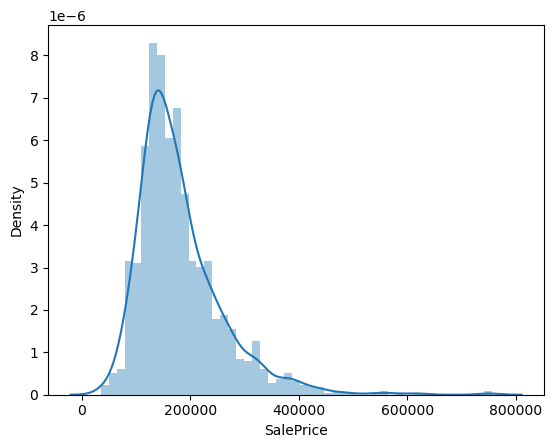

In [97]:
sns.distplot(df['SalePrice']);

Our SalePrices are highly right skewed so it will be a good idea to make log transformation

In [98]:
df['SalePrice'] = np.log1p(df['SalePrice'])

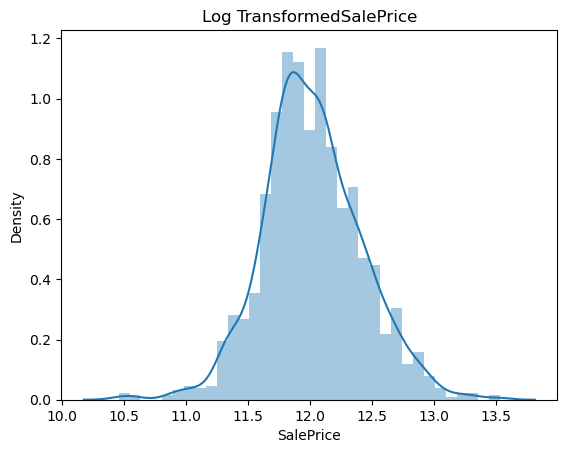

In [99]:
sns.distplot(df['SalePrice'])
plt.title('Log TransformedSalePrice');

In [101]:
df['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Encode categorical variables

### Nominal Categories

In [102]:
nominal_categories = ['MSZoning', 'Condition1', 'HouseStyle', 'SaleCondition']

In [103]:
df_encoded = pd.get_dummies(df[nominal_categories], columns=nominal_categories)

In [104]:
df.drop(columns=nominal_categories, inplace=True)

In [105]:
df = pd.concat([df, df_encoded], axis=1)

### Ordinal Categories

In [106]:
ordinal_categories = ['ExterCond',	'KitchenQual']

In [107]:
ordinal_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [108]:
df['ExterCond'] = df['ExterCond'].map(ordinal_mapping)

In [109]:
df['KitchenQual'] = df['KitchenQual'].map(ordinal_mapping)

In [110]:
df.sample(3)

,LotArea,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1506,17360,6,6,4,3,6,470.0,1,2010,NaN,2338.0,2.0,61,60,140000.0,10.0,300,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2536,6221,5,5,3,3,5,528.0,10,2007,NaN,2083.0,2.0,69,60,200624.0,8.0,288,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1977,12460,7,5,3,3,8,400.0,5,2008,NaN,3359.0,2.5,11,10,181000.0,14.0,188,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Scale or normalize numerical features

For regression tasks, it's generally a good practice to standardize the features rather than normalizing them.  
Standardization (or Z-score scaling) is often preferred because it centers the data around a mean of 0 and scales it based on the standard deviation.  
This can be particularly helpful for models like linear regression, support vector machines, and neural networks, as they often assume that the features are normally distributed.

In [111]:
# Before standardization lets seperate SalePrice, to avoid standa

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [113]:
df_standardized.sample(10)

,LotArea,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2849,0.703687,-0.777338,1.289192,2.457682,-0.769387,1.621698,-0.607520,0.291925,-1.361870,NaN,1.163307,0.970628,0.701954,1.015809,0.478183,0.683920,0.751811,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2676,0.117950,1.363746,-0.521016,-0.238564,0.745212,1.621698,1.925325,1.400396,-1.361870,NaN,2.004542,1.589647,-0.688309,-0.422961,2.264391,1.818868,2.516708,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
810,-0.045288,-0.063643,0.384088,-0.238564,-0.769387,0.348201,-0.797716,-0.816545,-0.602994,-0.131888,0.418994,-0.886431,0.437142,1.255604,-0.595285,-0.451027,1.537261,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,0.993774,-0.05276,-0.089693,-0.652707,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2757,0.209107,-0.063643,1.289192,-0.238564,-0.769387,1.621698,-1.080689,-0.447055,-1.361870,NaN,0.159292,-1.505450,1.562592,-0.566838,-0.873284,-1.018501,-0.369584,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
104,-0.300324,0.650051,-1.426120,-2.934811,-0.769387,0.348201,-1.080689,-0.077565,-0.602994,0.045622,0.386686,-0.886431,1.330882,1.639276,-1.250443,-0.734764,0.676105,-0.093544,-0.219089,-0.095413,-1.871664,2.303551,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,2.870049,-0.081464,-1.006265,-0.05276,-0.089693,-0.652707,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
415,-0.289313,-0.063643,1.289192,-0.238564,-0.769387,-0.288547,-0.152907,-1.186035,-1.361870,-0.268770,-0.589992,-0.886431,-0.224888,0.296424,-0.683820,0.116447,-1.065133,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2644,-0.056811,1.363746,-0.521016,-0.238564,0.745212,0.348201,1.911408,-1.555525,-1.361870,NaN,0.587986,1.589647,-0.886918,-0.662756,2.264391,0.683920,0.075189,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2124,0.358006,-0.777338,-1.426120,-0.238564,-0.769387,-0.288547,-0.338463,-1.925016,0.155883,NaN,-0.132718,-0.267411,1.694998,1.639276,-0.683820,-0.451027,0.732885,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,4.138331,-2.498241,

In [114]:
#lets check if sth went wrong during many processes and have any null values apart from y_target
df_standardized.isnull().sum().sort_values(ascending=False)

SalePrice                1431
LotArea                     0
HouseStyle_2.5Fin           0
Condition1_PosA             0
Condition1_PosN             0
Condition1_RRAe             0
Condition1_RRAn             0
Condition1_RRNe             0
Condition1_RRNn             0
HouseStyle_1.5Fin           0
HouseStyle_1.5Unf           0
HouseStyle_1Story           0
HouseStyle_2.5Unf           0
Condition1_Feedr            0
HouseStyle_2Story           0
HouseStyle_SFoyer           0
HouseStyle_SLvl             0
SaleCondition_Abnorml       0
SaleCondition_AdjLand       0
SaleCondition_Alloca        0
SaleCondition_Family        0
SaleCondition_Normal        0
Condition1_Norm             0
Condition1_Artery           0
OverallQual                 0
Total_Bathrooms             0
OverallCond                 0
ExterCond                   0
KitchenQual                 0
TotRmsAbvGrd                0
GarageArea                  0
MoSold                      0
YrSold                      0
Total_Area

# 3. Data Splitting

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# finding the split index. 
len_test  = df_standardized['SalePrice'].isnull().sum()
len_total = len(df_standardized)
split_index = len_total - len_test

In [117]:
split_index

1451

In [118]:
X_train = df_standardized.iloc[:split_index].drop(columns=['SalePrice'])
y_train = df_standardized.iloc[:split_index]['SalePrice']
X_test = df_standardized.iloc[split_index:].drop(columns=['SalePrice'])

In [126]:
print(len(X_train))
print(len(y_train))

1451
1451


In [119]:
y_train.tail()

1446    0.125581
1447    0.582112
1448    1.178729
1449   -0.395445
1450   -0.302494
Name: SalePrice, dtype: float64

# 4. Model Selection and Training

In [121]:
from sklearn.linear_model import LinearRegression

# Lets instantiate the model
model = LinearRegression()

In [122]:
# Lets train the model
model.fit(X_train, y_train)

LinearRegression()

In [123]:
# lets make predictions
y_pred = model.predict(X_test)

## Transform Back the predictions

In [128]:
scaler = StandardScaler()

In [136]:
# Reshape my predictions to a 2D array
y_pred_2d = y_pred.reshape(-1, 1)

# Lets now Fit the StandardScaler object to my predictions
scaler.fit(y_pred_2d)

StandardScaler()

In [138]:
predictions_standardized = scaler.inverse_transform(y_pred_2d)

In [142]:
predictions_standardized

array([[-0.83254285],
       [-0.13549919],
       [-0.10944148],
       ...,
       [-0.08183514],
       [-0.73482645],
       [ 0.49733084]])

In [143]:
predictions = np.exp(predictions_standardized[:, 0])

In [144]:
predictions

array([0.43494189, 0.87327987, 0.89633461, ..., 0.92142385, 0.47958868,
       1.64432644])

# 6. Model Evaluation

# 7. Hyperparameter Tuning (Optional)

# 8. Final Model Training and Predictions

# 9. Conclusion